# Lucas Kanade Models - Basics
The aim of this notebook is to showcase how one can build and fit Lucas Kanade to images using ``menpofit``.

Note that this notebook assumes that the user has previously gone through the AAMs Basics notebook and he/she is already familiar with the basics of `Menpo`'s Deformable Model Fitting framework explained in there.

## 1. Loading data

In [1]:
%matplotlib inline
from pathlib import Path
import menpo.io as mio


takeo = mio.import_builtin_asset.takeo_ppm()
takeo = takeo.as_greyscale(mode='luminosity')

# Use a bounding box rather than the facial shape
takeo.landmarks['bounding_box'] = takeo.landmarks['PTS'].lms.bounding_box()

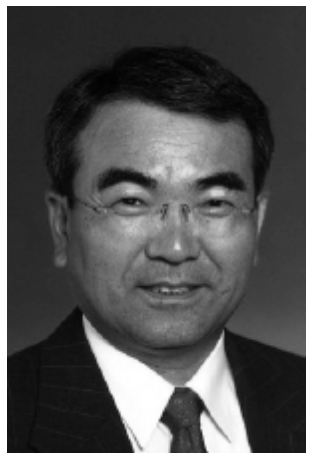

In [2]:
takeo.view();

Lucas-Kanade methods align a given template onto a provided image. Therefore, we must create a template that we will seek within a given input image. For example, a sensible template for the Takeo image might be the facial region.

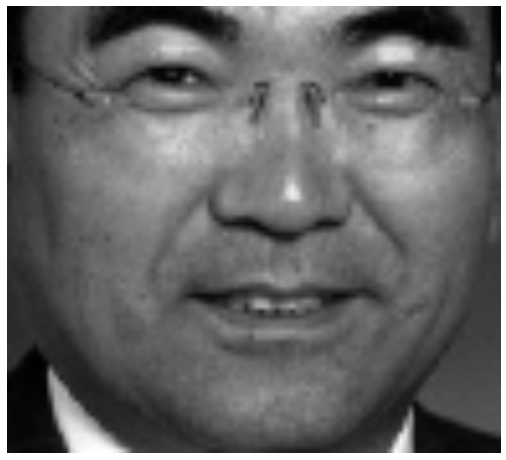

In [3]:
template = takeo.crop_to_landmarks(group='bounding_box')

template.view();

## 2. Build a Lucas Kanade fitter

Building an LK fitter using `Menpo` can be done using a single line of code.

In [4]:
from menpofit.lk import LucasKanadeFitter


fitter = LucasKanadeFitter(template, group='bounding_box')

## 3. Fit using the LK fitter

In `Menpo`, LK fitters can be fitted to images by creating `Fitter` objects around them. 

Fitting a `LucasKanadeFitter` to an image is as simple as calling its `fit_from_bb` method. We will attempt to fit the cropped template we created earlier onto a perturbed version of the original image.

In [5]:
from menpofit.fitter import noisy_shape_from_bounding_box

gt_bb = takeo.landmarks['bounding_box'].lms
# generate perturbed bounding box
init_bb = noisy_shape_from_bounding_box(fitter.reference_shape, gt_bb)
# fit image
fr = fitter.fit_from_bb(takeo, init_bb, gt_shape=gt_bb) 

# print fitting error
print(fr)

Fitting result of 4 landmark points.
Initial error: 0.0520
Final error: 0.0000


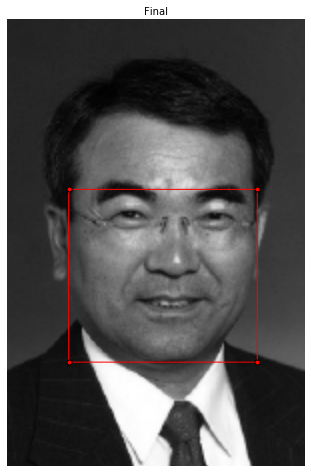

In [6]:
fr.view_widget()